[![resume](./logo.png)](https://kind-stone-04621511e.1.azurestaticapps.net/)
# Dental Office 🦷🪥
> Business Analysis 📈

I'd like to say that for the last two years, I've been freelance working in a dental office. I really didn't study any similar to it. I have no practical knowledge on, notwithstanding I have taken part in `managing data`. In other words, I know we should take care of patients data and manipulate it wisely. Process, understand and interpret data is important in the `decision-making process` so we can know who is visiting us and measure the impact it generates on business profits. 


## Data source📔    
The database that we query in this analysis is temporarily hosted on an Azure IaaS service, specifically Azure Data Base for PostgreSQL, so if you try to connect to it, you won't have access given that the information is sensitive and must be protected.

![img](https://i.ibb.co/7phWSrF/Recurso-2.png)

## Connect DataBase/Python 

`Psycopg` is the most popular PostgreSQL database adapter for python and all we need to do is `import psycopg2` instantiate `connect` and indicate server-general information easily obtained from azure.

In [1]:
#We'll use pandas and numpy for data manipulation
import pandas as pd
import numpy as np
#We use seaborn and matplotlib to plot the data
import seaborn as sns
import matplotlib.pyplot as plt 
#Library to connect with postgresql
import psycopg2

#Establish connection with server adminsql@az-postgresql-server host on azure as IaaS
conn_sql = psycopg2.connect(user = "adminsql@az-postgresql-server",
                            password = "CEdndm1246",
                            host = "az-postgresql-server.postgres.database.azure.com",
                            port = "5432",
                            database = "postgres")

## Database Query
The database is made up of eleven tables, however, only three are dependent and the remaining eight are independent, which means that it is a low-complexity database where the patient table is connected to the treatment table through the transition table patient_treatment and that's it, as shown below the query indicates the type of `JOIN` and the aliases given to each column.## Database Query
The database is made up of eleven tables, however, only three are dependent and the remaining eight are independent, which means that it is a low-complexity database where the patient table is connected to the treatment table through the transition table patient_treatment and that's it, as shown below the query indicates the type of `JOIN` and the aliases given to each column.

In [2]:
query_sql = '''
SELECT date AS "appointment day", hour AS "appointment hour", 
LOWER(f_name) AS "patient name", LOWER(type_of_id) AS "type of id",
LOWER(place_of_issuance) AS "id-document-issuance",  date_of_birth AS birthday,
LOWER(genre) AS genre, LOWER(health_care_facility) AS "healthcare facility", 
LOWER(occupation) AS occupation, LOWER(oral_hygiene) AS "oral hygiene", 
brushed_per_day AS brushing , LOWER(smoke) AS smoker, dental_floss AS "floss usage", 
LOWER(alcohol) AS alcoholic, LOWER(proceed) AS "dental-procedure",
LOWER(method_of_payment) AS "payment method", cost, material_expense AS "dental-materials-cost",
LOWER(procedure_status) AS "procedure-status", extract(year from AGE(date_of_birth)) as age

-- INNER JOIN is better than LEFT JOIN given raw data is quite incomple
FROM patient
INNER JOIN type_of_id USING (type_of_id_id)
INNER JOIN genre USING (genre_id)
INNER JOIN health_care_facility USING (health_care_facility_id)
INNER JOIN occupation USING (occupation_id)
INNER JOIN neighborhood USING (neighborhood_id)
INNER JOIN patient_treatment USING (patient_id)
INNER JOIN treatment USING (treatment_id)
INNER JOIN proceed USING (proceed_id)
INNER JOIN business_reference USING (business_reference_id)
INNER JOIN method_of_payment USING (method_of_payment_id)
'''
#Using pd.read_sql we read the data and store it in dental_office_raw or raw data.
dental_office_raw = pd.read_sql(query_sql, conn_sql)
#Create a copy() in case we need to get back to it.
dental_office = dental_office_raw.copy()
#Extract a sample from it making sure it's been query properly.
dental_office.sample(10)

/home/danmuner/packages/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


appointment day appointment hour patient name type of id  \
100      2021-07-26         16:14:00         olga         cc   
205      2021-10-30         12:00:00        ibeth         cc   
423      2022-02-25         07:42:00      claudia         cc   
63       2021-06-23         11:34:00       sergio         cc   
590      2022-05-07         15:02:00          ana         cc   
107      2021-07-30         11:36:00        devid         cc   
466      2022-03-16         11:11:00      sacaria         cc   
219      2021-11-08         14:46:00    margarita         cc   
411      2022-02-18         14:48:00       ramiro         cc   
40       2021-05-25         00:00:00     nathalie         cc   

    id-document-issuance    birthday      genre healthcare facility  \
100               bogota  1977-03-19   femenino           famisanar   
205              bolivar  1967-12-08   femenino           compensar   
423              gachala  1978-05-01   femenino           compensar   
63                bogota  1991-07-04  masculino                  no   
590               bogota  1978-12-16   femenino             sanitas   
107               bogota  1992-07-24  masculino           famisanar   
466               bogota  1957-06-10  masculino           compensar   
219          bucaramanga  1954-10-01   femenino           famisanar   
411               bogota  1979-01-12  masculino           nueva eps   
40                bogota  1987-07-29   femenino             sanitas   

        occupation oral hygiene  brushing smoker floss usage alcoholic  \
100       empleado       beuna        2.0   non         None      None   
205    ama de casa       buena        2.0     no          NO        no   
423       empleado        buena       NaN    no           SI        no   
63        empleado        mala        1.0    no          SI         no   
590  independiente        buena       NaN    si          NO        si    
107       empleado      regualr       2.0     no         NO        no    
466    ama de casa        buena       3.0    si          NO        si    
219    ama de casa        buena       NaN    si           SI        no   
411  independiente        buena       NaN    no          NO         no   
40   independiente       buena        2.0     no          NO        no   

                          dental-procedure payment method      cost  \
100             resina u obturacion ii sup       efectivo  130000.0   
205  protesis convensional biodent parcial       efectivo  140000.0   
423                       resina de angulo       efectivo  100000.0   
63               resina u obturacion i sup       efectivo  200000.0   
590           retratamiento multiradicular       efectivo  210000.0   
107              endodoncia multiradicular       efectivo   50000.0   
466                             detartraje       efectivo   90000.0   
219    protesis convensional biodent total       efectivo  100000.0   
411              exo perm cerrado ogeneral          nequi   90000.0   
40                                  nucleo       efectivo  190000.0   

     dental-materials-cost procedure-status   age  
100                11161.0                t  45.0  
205                 8012.0                t  54.0  
423                11161.0                t  44.0  
63                 11161.0                t  30.0  
590                    NaN                t  43.0  
107                    NaN                t  29.0  
466                  907.0                t  65.0  
219                    NaN                p  67.0  
411                 6289.0                t  43.0  
40                 12090.0                t  34.0

In [3]:
#Identify how many columns and rows has the DataFrame 
dental_office.shape

(625, 20)

## Data Exploration 👨‍💻🔍

`info () besides indicating the data type shows us null values, so here is were we can decide, whether to cast or not data to their respective types and even categorize it for further analysis.

- Identify data types and null data
- Casting `birthday` and `appointment day` to date type.
- Identify unique values within the next columns, `smoker`, `floss usage`, `alcoholic`, `oral hygiene`, correct semantic errors and remove blanks.

In [4]:
#Data types and missing values
dental_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   appointment day        624 non-null    object 
 1   appointment hour       625 non-null    object 
 2   patient name           624 non-null    object 
 3   type of id             625 non-null    object 
 4   id-document-issuance   625 non-null    object 
 5   birthday               617 non-null    object 
 6   genre                  625 non-null    object 
 7   healthcare facility    625 non-null    object 
 8   occupation             625 non-null    object 
 9   oral hygiene           624 non-null    object 
 10  brushing               397 non-null    float64
 11  smoker                 624 non-null    object 
 12  floss usage            621 non-null    object 
 13  alcoholic              620 non-null    object 
 14  dental-procedure       625 non-null    object 
 15  paymen

In [5]:
#Turning object type to datetime64
dental_office['appointment day'] = pd.to_datetime(dental_office['appointment day'])
dental_office['birthday'] = pd.to_datetime(dental_office['birthday'])

In [6]:
#Semantic errors identified in smoker column
dental_office['smoker'].unique()[1:4]

array(['no ', 'si ', 'non '], dtype=object)

In [7]:
dental_office['smoker'].replace({'no ': 'no', 'non ': 'no','si ':'si'}, inplace=True)
dental_office['smoker'].unique()

array(['no', 'si', None], dtype=object)

In [8]:
#Semantic errors identified in floss usage column
dental_office['floss usage'].unique()

array(['SI', 'NO ', 'NO', 'SI ', None, ' NO ', 'MNO '], dtype=object)

In [9]:
dental_office['floss usage'].replace({'NO ': 'no','NO': 'no','MNO ': 'no',' NO ': 'no', 'SI ': 'si','SI':'si'}, inplace=True)
dental_office['floss usage'].unique()

array(['si', 'no', None], dtype=object)

In [10]:
#Semantic errors identified in alcoholic column
dental_office['alcoholic'].unique()

array(['no', 'si', 'no ', None, 'nio', 'si '], dtype=object)

In [11]:
dental_office['alcoholic'].replace({'no ':'no','nio':'no','si ':'si'},inplace=True)
dental_office['alcoholic'].unique()

array(['no', 'si', None], dtype=object)

In [12]:
#Semantic errors identified in oral hygeine column
dental_office['oral hygiene'].replace({'buena ':'buena','mala ':'mala','regular ':'regular','regualr':'regular','bueno ':'buena','buena 2':'buena','bueno':'buena'}, inplace=True)
dental_office['oral hygiene'].unique()

array(['buena', 'regular', 'mala', 'beuna ', None], dtype=object)

In [13]:
#Below we indicate the number of missing values per column
null_values = dental_office.isnull().sum().reset_index()
null_values.rename(columns={'index':'col_name',0:'null_val'},inplace=True)
null_values = null_values[null_values['null_val']>0].reset_index(drop=True)
null_values

col_name  null_val
0         appointment day         1
1            patient name         1
2                birthday         8
3            oral hygiene         1
4                brushing       228
5                  smoker         1
6             floss usage         4
7               alcoholic         5
8                    cost        35
9   dental-materials-cost       282
10       procedure-status        16
11                    age         8

There are control or follow-up dental visits, which do not have any associated cost, so we'll replace all the missing values in the `cost` column with 0. This does not happen with other columns such as `brushing`, which we will discard from the analysis given the missing values; in doing so, we'll proceed to remove duplicates based on the remaining columns.

In [14]:
dental_office['cost'].fillna(0, inplace=True)
dental_office['dental-materials-cost'].fillna(0,inplace=True)

dental_office.dropna(how='any', subset=['patient name','birthday','smoker','floss usage','alcoholic','procedure-status','appointment day'], inplace=True)

dental_office = dental_office[['appointment day', 'appointment hour', 'patient name', 'type of id',
       'id-document-issuance', 'birthday','age', 'genre', 'healthcare facility',
       'occupation', 'oral hygiene', 'smoker', 'floss usage',
       'alcoholic', 'dental-procedure', 'payment method', 'cost','dental-materials-cost', 'procedure-status']]

In [15]:
#Turning object type into categorical 
dental_office = dental_office.astype({"type of id":"category", "id-document-issuance":'category',"genre":'category',
                                      "healthcare facility":'category',"occupation":'category',"oral hygiene":'category',
                                      "smoker":'category',"floss usage":'category',"alcoholic":'category',
                                      "dental-procedure":'category',"payment method":'category',
                                      "procedure-status":'category',"age":'int'})

### Procedures performed on patients grouped by gender with the highest cost.

This information compiles the procedures in which both men and women invested more money. We create a grouped table for each gender, then we do an append.

- The most expensive procedure accessed by patients grouped by gender and most frequently used are flexible prostheses.

In [16]:
#Set up display options for floating format
pd.options.display.float_format = '{:.0f}'.format
#Add to columns filtered by gender
dental_office['counts'] = 1
women_top_proc = dental_office[dental_office['genre']=='femenino'].groupby(['genre','dental-procedure'])['cost'].median().sort_values(ascending=False).head(5)
men_top_proc = dental_office[dental_office['genre']=='masculino'].groupby(['genre','dental-procedure'])['cost'].median().sort_values(ascending=False).head(5)
men_top_proc.append(women_top_proc).to_frame()

/tmp/ipykernel_1605/732345006.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  men_top_proc.append(women_top_proc).to_frame()


cost
genre     dental-procedure                             
masculino protesis flexible isosit parcial      1000000
          protesis alto impacto duratone total   500000
          protesis flexible duratone parcial     380000
          protesisflexible biodent parcial       335000
          recubrimiento multiradicular           315000
femenino  protesis flexible superc parcial       700000
          protesis alto impacto biodent parcial  330000
          recubrimiento multiradicular           325000
          exo caninos cirujano                   320000
          protesis flexible duratone parcial     300000

### Descriptive Income Statistics regarding gender and occupation

**Note**: Errors are evident in the male gender with respect to the occupation `housewife` which does not usually apply to this gender and was applied by mistake.

- The median is the same for self-employed and employees regardless of gender.
- Unemployed men have the highest standard deviation, which could be due to an error when entering the type of patient. In addition, there is no agreement that the unemployed present the second highest income. Opposed to what happens with women.

In [17]:
#Income grouped by genre and occupation
dental_office.groupby(['genre','occupation'])['cost'].describe()

count   mean    std   min   25%   50%    75%     max
genre     occupation                                                         
femenino  ama de casa       57 149333 221572     0 40000 80000 140000 1200000
          desempleado       11  64455  87363     0 14500 50000  55000  300000
          empleado         121 145117 235849     0 50000 90000 130000 2123123
          estudiante        54  87278  93164     0 50000 61000  98750  600000
          independiente    122 113713 104347     0 56250 90000 147500  740000
masculino ama de casa        4  72500  26300 50000 50000 70000  92500  100000
          desempleado       12 326667 596659 10000 15000 85000 207500 2000000
          empleado          73 108274 102846     0 55000 90000 110000  650000
          estudiante        18  47778  36146     0 15000 50000  70000  140000
          independiente    122 112574 101579     0 50000 90000 140000  620000

### Analysis of essential aspects in oral care

There are bad habits that affect teeth health,  such as `smoking ',` drinking alcohol`,  or not brushing  properly. They can cause either short- or long-term problems depending on each patient.  Focusing health and prevention campaigns on populations with higher incidences of bad habits can help.

**Smokers**

- In terms of occupation, employees and self-employed have the most significant percentage or a higher tendency to smoke. It should be noted that the amount of data for categories other than employees and self-employed is not significant, which increases the bias in the given conclusion.

**Oral hygiene**

- Oral hygiene is related to the number of times we brush our teeth per day, where 3 is good, 2 is regular and 1 is bad.
-More than 50%of patients, both men and women, have good hygiene, which makes sense in patients who are attentive to their oral health. Usually patients who have bad habits in their oral health do not usually visit the dentist.

**Dental Floss**

- Dental floss is a very important habit, but just a few 4 out of 10 people use it.

**Alcohol**

- The question, Do you consume alcoholic beverages?. Well,  patients don't know what to answer, or they associate it with people who abuse alcoholic beverages, so we should reword the question and make the patient feel more comfortable instead of being attacked with the question. 

In [18]:
#Smokers percentage
pd.options.display.float_format = '{:.2f}%'.format
p_smoker = dental_office.groupby(['genre','smoker','occupation'])[['counts']].sum()
p_smoker = p_smoker.groupby(level=0).apply(lambda x :  x /x.sum()*100).unstack('occupation')
p_smoker.xs('si',level=1)

counts                                              
occupation ama de casa desempleado empleado estudiante independiente
genre                                                               
femenino         2.19%       0.00%   10.68%      4.66%         9.32%
masculino        1.31%       0.44%   11.79%      2.62%        19.21%

In [19]:
#Oral hygeine percentage grouped by gender
p_hygiene = dental_office.groupby(['genre','oral hygiene'])[['counts']].sum()
p_hygiene.groupby(level=0).apply(lambda x : x / x.sum()*100)

counts
genre     oral hygiene        
femenino  buena         63.84%
          mala           0.55%
          regular       35.62%
masculino buena         50.22%
          mala           9.17%
          regular       40.61%

In [20]:
#Dental floss usage grouped by gender
p_floss = dental_office.groupby(['genre','floss usage'])[['counts']].sum()
p_floss.groupby(level=0).apply(lambda x : x / x.sum()*100)

counts
genre     floss usage        
femenino  no           58.90%
          si           41.10%
masculino no           68.56%
          si           31.44%

In [21]:
#Alcohol consumption grouped by gender
p_alcoholic = dental_office.groupby(['genre','alcoholic','occupation'])[['counts']].sum()
p_alcoholic = p_alcoholic.groupby(level=0).apply(lambda x : x / x.sum()*100)
p_alcoholic.unstack('occupation').xs('si',level=1)

counts                                              
occupation ama de casa desempleado empleado estudiante independiente
genre                                                               
femenino         0.82%       0.00%    8.49%      4.11%         7.67%
masculino        1.31%       0.00%    5.68%      2.62%        14.41%

###Patients Preferred Payment Methods

Payment options are increasingly diverse to make it easier for patients to access dental treatment. We could analyze payment methods with regard to different population groups. but for this analysis we will focus on relating them in regard to the occupation and the generation each patient belongs to.

**Generation/Occupation**

Despite the convenience of bank or mobile transfers, they aren't as representative as cash, or traditional payment methods. Creditcart transfers in some cases involve tax payments and have also not been adopted by all generations or age ranges. The graph `percentage by generation` shows the segment of patients that belongs to each generation.
- Approximately 45% of patients are `Gen Z` and `Millennials` i.e., a population made up of youth and young adults whose use of EFT's is likely to be greater than older adults.
- When we cross  generations data regarding payment methods, we observe that a higher percentage of electronic payments are in `Millennials` compared to other generations. Despite being a representative population of the total number of patients, the preferred payment method is the traditional one by far.
- **Note**: Create a table that allows validating whether the `Millennials` generation that has access to dental treatments are actually the most active at work so they can afford them. **Answer**: The `Millennials` generation are the most active at work. Most of them are self-employed.
- People whose occupation is self-employed are the population that uses the most electronic payment methods, with more than 20% of the total.

In [22]:
#This func allow us to categorize patient age group by generations 
def patient_gen(x):
  if x >= 10 and x <= 25:
    return 'Gen Z'
  elif x >= 26 and x <= 41:
    return 'Millennials'
  elif x >= 42 and x <= 57:
    return 'Gen X'
  elif x >= 58 and x <= 67:
    return 'Boomers II'
  elif x >= 68 and x <= 76:
    return 'Boomers I'
  elif x >= 77 and x <= 94:
    return 'Post War Gen'
  else:
    return 'None'

dental_office['patient_gen'] = dental_office['age'].apply(patient_gen)

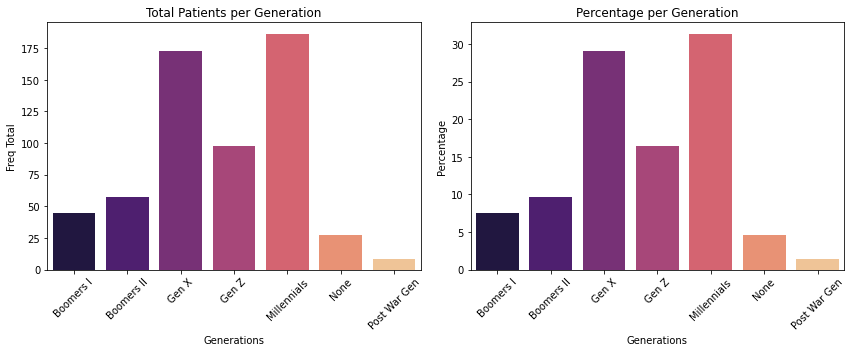

In [23]:
#Patients bar chart according to the generational group to which they belong.

patient_gens = dental_office.groupby('patient_gen')[['counts']].sum()
total_patient_gen = patient_gens.reset_index().rename(columns={'counts':'total'})
percent_patient_gen = patient_gens.groupby(level=0).apply(lambda x:x/patient_gens.sum()*100).reset_index().rename(columns={'counts':'percentage'})

fig,axes = plt.subplots(1,2,figsize=(12,5))
axes[0].set_title('Total Patients per Generation')

t = sns.barplot(ax=axes[0], data=total_patient_gen, x='patient_gen',y='total',palette='magma')
plt.xticks(rotation=45)
t.set_xlabel('Generations')
t.set_ylabel('Freq Total')
t.set_xticklabels(['Boomers I', 'Boomers II', 'Gen X', 'Gen Z', 'Millennials', 'None',
       'Post War Gen'], rotation=45)

axes[1].set_title('Percentage per Generation')

p = sns.barplot(ax=axes[1], data=percent_patient_gen, x='patient_gen',y='percentage',palette='magma')
p.set_xlabel('Generations')
p.set_ylabel("Percentage")
p.set_xticklabels(['Boomers I', 'Boomers II', 'Gen X', 'Gen Z', 'Millennials', 'None',
       'Post War Gen'], rotation=45)
fig.tight_layout()
percent_patient_gen
plt.show()

In [24]:
#Tabulate crossed data between generation and payment method

pd.options.display.float_format = '{:.2f}%'.format
non_common_methods = ['trans_bancolombia','trans_davivienda','otro']
prefer_payment = dental_office[~dental_office['payment method'].isin(non_common_methods)]
prefer_payment = prefer_payment.groupby(['patient_gen','payment method'])[['counts']].sum()
prefer_payment = prefer_payment.groupby(level=0).apply(lambda x:x/x.sum()*100)
prefer_payment.unstack('payment method').iloc[:,:4]

counts                         
payment method   bold daviplata efectivo nequi
patient_gen                                   
Boomers I      35.56%     0.00%   64.44% 0.00%
Boomers II     14.04%     0.00%   82.46% 3.51%
Gen X           8.72%     1.16%   85.47% 4.65%
Gen Z           3.37%     5.62%   85.39% 5.62%
Millennials    12.57%     2.73%   77.60% 7.10%
None            3.85%     3.85%   88.46% 3.85%
Post War Gen    0.00%     0.00%  100.00% 0.00%

In [25]:
#Tabulate crossed data between generation and occupation
pd.options.display.float_format = '{:.2f}%'.format
non_common_methods = ['trans_bancolombia','trans_davivienda','otro']
generation_payment = dental_office[~dental_office['payment method'].isin(non_common_methods)]
generation_payment = generation_payment.groupby(['patient_gen','occupation'])['counts'].sum()
generation_payment.groupby(level=0).apply(lambda x:x/x.sum()*100).unstack('occupation')

occupation    ama de casa  desempleado  empleado  estudiante  independiente
patient_gen                                                                
Boomers I          40.00%        8.89%    15.56%       2.22%         33.33%
Boomers II         24.56%        3.51%    29.82%       1.75%         40.35%
Gen X               8.72%        2.33%    36.05%       1.16%         51.74%
Gen Z              10.11%        2.25%    32.58%      40.45%         14.61%
Millennials         1.64%        3.28%    38.25%       3.83%         53.01%
None                0.00%        0.00%    11.54%      84.62%          3.85%
Post War Gen       12.50%       62.50%     0.00%       0.00%         25.00%

In [26]:
#Prefered payment methods groupped by occupation 
non_common_methods = ['trans_bancolombia','trans_davivienda','otro']
p_payment = dental_office[~dental_office['payment method'].isin(non_common_methods)]
p_payment = p_payment.groupby(['occupation','payment method'])[['counts']].sum()
p_payment = p_payment.groupby(level=0).apply(lambda x : x / x.sum()*100)
p_payment.unstack('payment method').iloc[:,:4]

counts                         
payment method   bold daviplata efectivo nequi
occupation                                    
ama de casa    15.00%     0.00%   83.33% 1.67%
desempleado     8.70%     0.00%   82.61% 8.70%
empleado       10.64%     5.32%   82.45% 1.60%
estudiante      5.80%     2.90%   84.06% 7.25%
independiente  12.92%     0.42%   79.17% 7.50%

## Revenue analysis over time series

An analysis of an income statement is normally made up of sales income, administrative expenses, operational costs, among others, in order to analyze net profit. However, for this case study we will only consider sales revenue without any deductions.

-The best way to analyze income regarding series series is from the mobile sock method, as shown in the graphic `Expenditure analysis per sex` the trend is clearer to create 30 -rows windows for a daily frequency for a daily frequency. This makes it possible to avoid negative spikes on days where there was no revenue.
- The categorization of income can be carried out with respect to different population groups. However, it will only be done with respect to gender and occupation.
-Men are the demographic group that are carried out less dental treatments. The downward trend in the last 2 years is worrisome, so it is suggested to perform a detailed analysis regarding this deficit of men.
- The categorization by occupation reflects that there is a greater fluctuation in the group of independent workers than in the group of employees, being the employees, the ones who have allowed the growth of the dental practice income.

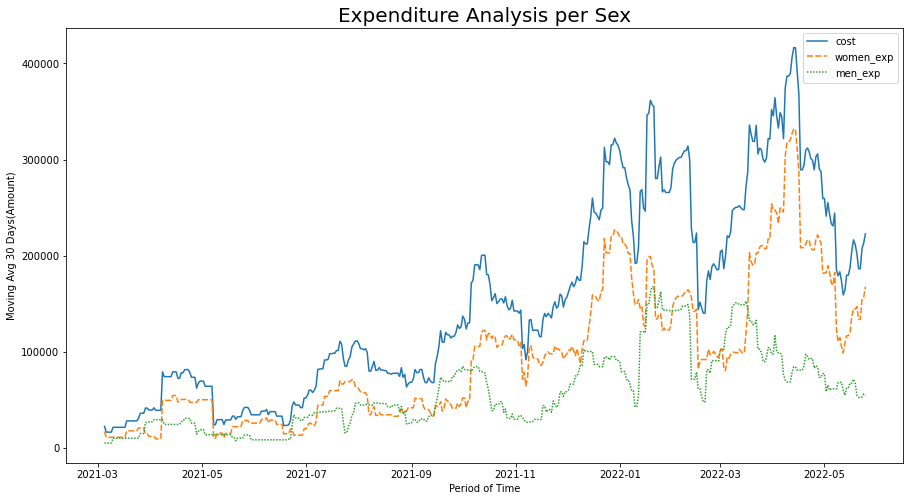

In [27]:
#Business income groupped by gender
dental_office['women_exp'] = dental_office[dental_office['genre'] == 'femenino']['cost']
dental_office['men_exp'] = dental_office[dental_office['genre'] == 'masculino']['cost']
date_analysis_D = dental_office.groupby(pd.Grouper(key='appointment day', freq='D'))[['cost','women_exp','men_exp']].sum()
sales_total = date_analysis_D.rolling(30).mean()
fig = plt.figure(figsize=(15,8))
sale_to = sns.lineplot(data=sales_total)
sale_to.set_title('Expenditure Analysis per Sex',fontsize=20)
sale_to.set_xlabel('Period of Time')
sale_to.set_ylabel('Moving Avg 30 Days(Amount)')
plt.show()

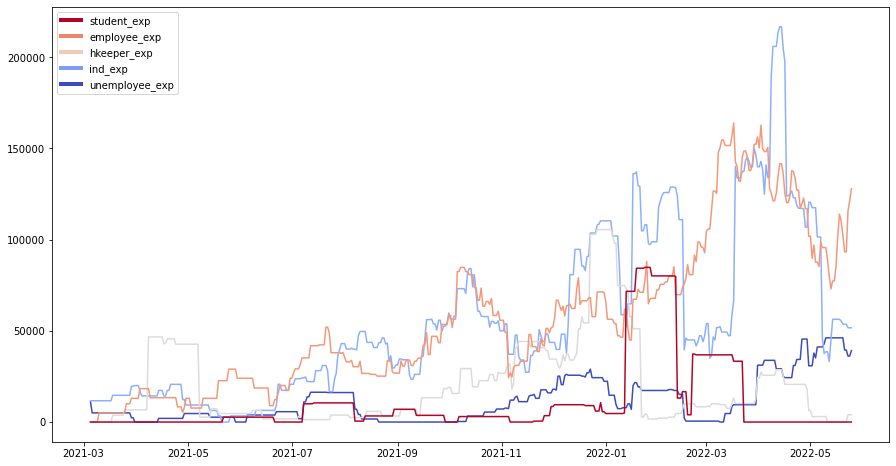

In [28]:
#Business income groupped by patient occupation
from matplotlib.lines import Line2D
from matplotlib import rcParams, cycler
cmap = plt.cm.coolwarm
custom_lines = [Line2D([0], [0], color=cmap(1.), lw=4),
                Line2D([0], [0], color=cmap(.8), lw=4),
                Line2D([0], [0], color=cmap(0.6), lw=4),
                Line2D([0], [0], color=cmap(0.2), lw=4),
                Line2D([0], [0], color=cmap(.0), lw=4)]

rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, 5)))


dental_office['student_exp'] = dental_office[dental_office['occupation'] == 'estudiante']['cost']
dental_office['employee_exp'] = dental_office[dental_office['occupation'] == 'empleado']['cost']
dental_office['hkeeper_exp'] = dental_office[dental_office['occupation'] == 'ama de casa']['cost']
dental_office['ind_exp'] = dental_office[dental_office['occupation'] == 'independiente']['cost']
dental_office['unemployee_exp'] = dental_office[dental_office['occupation'] == 'desempleado']['cost']

date_analysis_occupation = dental_office.groupby(pd.Grouper(key='appointment day', freq='D'))[['student_exp','employee_exp','hkeeper_exp','ind_exp','unemployee_exp']].sum()
sales_occupation = date_analysis_occupation.rolling(30).mean()

fig, ax = plt.subplots(figsize=(15, 8))
lines = ax.plot(sales_occupation)

sale_to.set_title('Expenditure Analysis per Occupation',fontsize=20)
sale_to.set_xlabel('Period of Time')
sale_to.set_ylabel('Moving Avg 30 Day(Amount)')
ax.legend(custom_lines, ['student_exp', 'employee_exp', 'hkeeper_exp','ind_exp','unemployee_exp']);
plt.show()



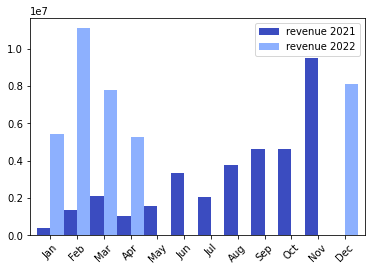

In [29]:
#Business income groupped by gender time series per year
pd.options.display.float_format = '{:.0f}'.format
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun","Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
dental_office['year'] = dental_office['appointment day'].dt.year
dental_office['month'] = dental_office['appointment day'].dt.month
#dental_office['month'] = pd.to_datetime(dental_office['appointment day'], format='%m').dt.month_name()
revenue = dental_office.groupby(['year','month'])[['cost']].sum()
revenue_2021 = revenue.xs(2021,level=0).rename(columns={'cost':'revenue 2021'})
revenue_2022 = revenue.xs(2022,level=0).rename(columns={'cost':'revenue 2022'})
revenue_year = pd.concat([revenue_2021,revenue_2022],axis=1).reset_index()
revenue_year['month'] = pd.Categorical(revenue_year['month'].apply(str))
revenue_year.plot.bar(stacked=False,width=1.0)
plt.xticks(np.arange(12),months, rotation=45)
plt.show()

 ## Conclusions

1. The case of study includes real data that contains sensitive information and that compromises the safety of patients, for this reason you will not be able to access the data if you try to access the server later on.
2. Understanding the categorical variables as population groups, it could be interesting to make a cross-union between the largest number of groups to analyze more in detail sales in detailed cases, such as sales income given by self-employed women who belongs to generation X and use dental floss properly.
3. The dental office should look forward to better communication channels that allow us to increase men's interest in oral health. Identify the possible reasons why this population hardly has access or interest to dental treatments.